In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Penggalian Data/Modul2/smartphones.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   avg_rating                 879 non-null    float64
 4   5G_or_not                  980 non-null    int64  
 5   processor_brand            960 non-null    object 
 6   num_cores                  974 non-null    float64
 7   processor_speed            938 non-null    float64
 8   battery_capacity           969 non-null    float64
 9   fast_charging_available    980 non-null    int64  
 10  fast_charging              769 non-null    float64
 11  ram_capacity               980 non-null    int64  
 12  internal_memory            980 non-null    int64  
 13  screen_size                980 non-null    float64

In [4]:
columns_to_fill_mean = ['price', 'avg_rating', '5G_or_not', 'num_cores', 'processor_speed',
                        'battery_capacity', 'fast_charging_available', 'fast_charging',
                        'ram_capacity', 'internal_memory', 'screen_size', 'refresh_rate',
                        'num_rear_cameras', 'primary_camera_rear', 'primary_camera_front',
                        'extended_memory_available', 'resolution_height', 'resolution_width']

df[columns_to_fill_mean] = df[columns_to_fill_mean].fillna(df[columns_to_fill_mean].mean())

columns_to_fill_random = ['brand_name', 'model', 'processor_brand', 'os']

for col in columns_to_fill_random:
    df[col] = df[col].fillna('random')
df

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,apple,Apple iPhone 11,38999,7.3,0,bionic,6.0,2.65,3110.000000,0,...,64,6.10,60,2,ios,12.0,12.0,0,1792,828
1,apple,Apple iPhone 11 (128GB),46999,7.5,0,bionic,6.0,2.65,3110.000000,0,...,128,6.10,60,2,ios,12.0,12.0,0,1792,828
2,apple,Apple iPhone 11 Pro Max,109900,7.7,0,bionic,6.0,2.65,3500.000000,1,...,64,6.50,60,3,ios,12.0,12.0,0,2688,1242
3,apple,Apple iPhone 12,51999,7.4,1,bionic,6.0,3.10,4817.748194,0,...,64,6.10,60,2,ios,12.0,12.0,0,2532,1170
4,apple,Apple iPhone 12 (128GB),55999,7.5,1,bionic,6.0,3.10,4817.748194,0,...,128,6.10,60,2,ios,12.0,12.0,0,2532,1170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,xiaomi,Xiaomi Redmi Note 9 Pro,13999,7.5,0,snapdragon,8.0,2.30,5020.000000,1,...,64,6.67,60,4,android,48.0,16.0,1,2400,1080
976,xiaomi,Xiaomi Redmi Note 9 Pro (4GB RAM + 128GB),14439,7.7,0,snapdragon,8.0,2.30,5020.000000,1,...,128,6.67,60,4,android,48.0,16.0,1,2400,1080
977,xiaomi,Xiaomi Redmi Note 9 Pro Max,16490,8.0,0,snapdragon,8.0,2.30,5020.000000,1,...,64,6.67,60,4,android,64.0,32.0,1,2400,1080
978,zte,ZTE Axon 30S,19999,8.2,1,snapdragon,8.0,3.20,4200.000000,1,...,128,6.90,120,4,android,50.0,16.0,1,2460,1080


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
# Encoding
label_encoder = LabelEncoder()

print(df["brand_name"].unique(),"\n")
df["brand_name_num"] = label_encoder.fit_transform(df["brand_name"])
print(df["brand_name_num"].unique(),"\n")

['apple' 'asus' 'blackview' 'blu' 'cat' 'cola' 'doogee' 'duoqin' 'gionee'
 'google' 'honor' 'huawei' 'ikall' 'infinix' 'iqoo' 'itel' 'jio' 'lava'
 'leeco' 'leitz' 'lenovo' 'letv' 'lg' 'lyf' 'micromax' 'motorola' 'nokia'
 'nothing' 'nubia' 'oneplus' 'oppo' 'oukitel' 'poco' 'realme' 'redmi'
 'royole' 'samsung' 'sharp' 'sony' 'tcl' 'tecno' 'tesla' 'vertu' 'vivo'
 'xiaomi' 'zte'] 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45] 



In [ ]:
# Normalisasi Data
scaler = StandardScaler()

df[['price', 'avg_rating' ,'5G_or_not' , 'num_cores', 'processor_speed',
    'battery_capacity', 'fast_charging_available', 'fast_charging', 'ram_capacity',
    'internal_memory', 'screen_size', 'refresh_rate', 'num_rear_cameras',
    'primary_camera_rear', 'primary_camera_front', 'extended_memory_available',
    'resolution_height', 'resolution_width']] = scaler.fit_transform(df[['price','avg_rating' ,'5G_or_not' , 'num_cores', 'processor_speed',
                                                                         'battery_capacity', 'fast_charging_available', 'fast_charging', 'ram_capacity',
                                                                         'internal_memory', 'screen_size', 'refresh_rate', 'num_rear_cameras',
                                                                         'primary_camera_rear', 'primary_camera_front', 'extended_memory_available',
                                                                         'resolution_height', 'resolution_width']])
df

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width,brand_name_num
0,apple,Apple iPhone 11,0.163964,-0.750426,-1.128619,bionic,-2.125170,0.490933,-1.702063e+00,-2.419328,...,-1.251536,-1.113307,-1.049277,ios,-1.161749,-0.423268,-1.306592,-0.818765,-0.854613,0
1,apple,Apple iPhone 11 (128GB),0.366436,-0.464998,-1.128619,bionic,-2.125170,0.490933,-1.702063e+00,-2.419328,...,-1.251536,-1.113307,-1.049277,ios,-1.161749,-0.423268,-1.306592,-0.818765,-0.854613,0
2,apple,Apple iPhone 11 Pro Max,1.958398,-0.179570,-1.128619,bionic,-2.125170,0.490933,-1.313361e+00,0.413338,...,-0.105350,-1.113307,0.239309,ios,-1.161749,-0.423268,-1.306592,0.916927,0.572891,0
3,apple,Apple iPhone 12,0.492981,-0.607712,0.886038,bionic,-2.125170,1.482573,1.160070e-16,-2.419328,...,-1.251536,-1.113307,-1.049277,ios,-1.161749,-0.423268,-1.306592,0.614731,0.324629,0
4,apple,Apple iPhone 12 (128GB),0.594217,-0.464998,0.886038,bionic,-2.125170,1.482573,1.160070e-16,-2.419328,...,-1.251536,-1.113307,-1.049277,ios,-1.161749,-0.423268,-1.306592,0.614731,0.324629,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,xiaomi,Xiaomi Redmi Note 9 Pro,-0.468761,-0.464998,-1.128619,snapdragon,0.273342,-0.280342,2.015785e-01,0.413338,...,0.381779,-1.113307,1.527895,android,-0.070315,-0.054386,0.765350,0.359026,0.014302,44
976,xiaomi,Xiaomi Redmi Note 9 Pro (4GB RAM + 128GB),-0.457625,-0.179570,-1.128619,snapdragon,0.273342,-0.280342,2.015785e-01,0.413338,...,0.381779,-1.113307,1.527895,android,-0.070315,-0.054386,0.765350,0.359026,0.014302,44
977,xiaomi,Xiaomi Redmi Note 9 Pro Max,-0.405716,0.248572,-1.128619,snapdragon,0.273342,-0.280342,2.015785e-01,0.413338,...,0.381779,-1.113307,1.527895,android,0.414767,1.421139,0.765350,0.359026,0.014302,44
978,zte,ZTE Axon 30S,-0.316907,0.534000,0.886038,snapdragon,0.273342,1.702938,-6.156917e-01,0.413338,...,1.040837,0.957568,1.527895,android,-0.009680,-0.054386,0.765350,0.475256,0.014302,45


In [9]:
# Data Splitting
X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
y_train

855    46990
678    84990
497     3499
796     7999
514    46999
       ...  
106     6799
270    28249
860    32990
435    12999
102    21990
Name: price, Length: 686, dtype: int64

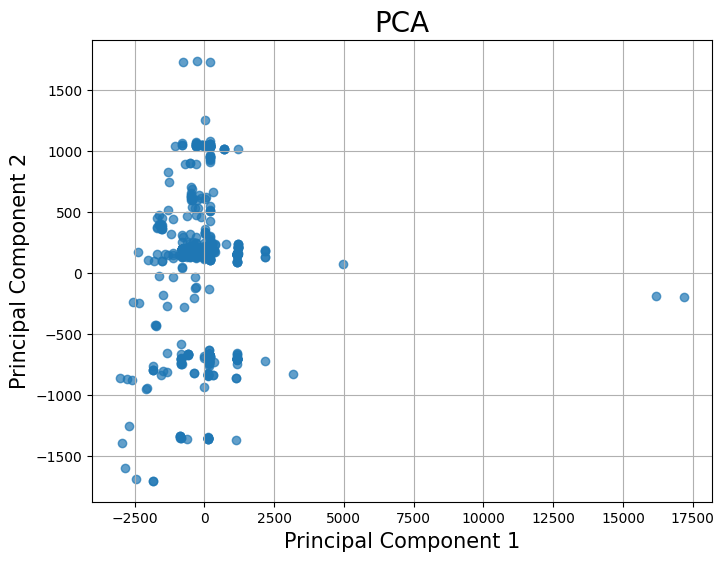

In [11]:
non_numeric_columns = ['brand_name', 'model', 'processor_brand', 'os']
X_numeric = X.drop(columns=non_numeric_columns)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_numeric)

principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Visualisasi scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(principal_df['PC1'], principal_df['PC2'], alpha=0.7)
plt.xlabel('Principal Component 1', fontsize=15)
plt.ylabel('Principal Component 2', fontsize=15)
plt.title('PCA', fontsize=20)
plt.grid(True)
plt.show()